# Lecture 3: Quantum Dynamics -- Schrodinger's Equation

### Review: Solution of Schrodinger Equation

Schrodinger's equation says that the change of the state vector $|\Psi\rangle$ is determined by the energy function (Hamiltonian) of the system $\hat{H}$:

$i\hbar\partial_t|\Psi\rangle = \hat{H}|\Psi\rangle$

If we know the initial state $|\Psi_0\rangle$ and the operator form of the Hamiltonian $\hat{H}$, we can, in principle, manually or with the help of a machine calculate the state vector at any moment of time $|\Psi_t\rangle$.

If the state $|\Psi\rangle$ is the state with well-defined energy (eigen-state of $\hat{H}$), then the time evolution is very simple. Since

$\hat{H}\,|\Psi\rangle=E|\Psi\rangle$  (eigen-problem)

Schrodinger equation becomes

$i\hbar\partial_t|\Psi\rangle = E|\Psi\rangle\qquad\longrightarrow\qquad \partial_t|\Psi\rangle = -\frac{iE}{\hbar}|\Psi\rangle$

and has a very simple solution $|\Psi_t\rangle=e^{-iEt/\hbar}|\Psi_0\rangle=e^{-i\theta}|\Psi_0\rangle$.

The state remains "almost the same", only acquiring extra phase $\theta=Et/\hbar$ as time goes by.

More generally, if we know all the eigen-states of the Hamiltonian operator, then we can use them as the basis vectors and expand the state vector:

$|\Psi\rangle = c_1|e_1\rangle+c_2|e_2\rangle$ -- more terms will be present if the number of energy levels is more than two.

The change of the state $|\Psi\rangle$ comes from the change in the coefficients $c_1$ and $c_2$, because the basis state-vectors are fixed -- they are solution to the time-independent eigen-value equation. 


Reminder: $\hat{H}\,|e_i\rangle=E_i|e_i\rangle$

Now, since $\hat{H}$ is a linear operator, we get 

$\hat{H}|\Psi\rangle = c_1(\hat{H}|e_1\rangle)+c_2(\hat{H}|e_2\rangle)=c_1E_1|e_1\rangle+c_2E_2|e_2\rangle$.

On the other hand, according to the left-hand side of Schrodinger equation, we have

$i\hbar\partial_t\,|\Psi\rangle=(i\hbar\partial_t c_1)|e_1\rangle+(i\hbar\partial_t c_2)|e_2\rangle$

Comparing the left-hand side of the ShrEq to the right-hand side, we arrive at

$(i\hbar\partial_t c_1)|e_1\rangle+(i\hbar\partial_t c_2)|e_2\rangle = c_1E_1|e_1\rangle+c_2E_2|e_2\rangle$.

The vector on the left equals to the vector on the right when their components in any basis are equal. Thus, we equate

$i\hbar\partial_t c_1=E_1c_1$ and similarly for $c_2$.

Again we arrive at a simple equation, this time for the numeric coefficient $c_i$. Its solution is simply $c_1=C_1e^{-iE_1t/\hbar}$.

Putting it all back together, we find the general form of the state evolution in time:

$|\Psi_t\rangle = C_1e^{-iE_1t/\hbar}|e_1\rangle+C_2e^{-iE_2t/\hbar}|e_2\rangle$, where $C_1$ and $C_2$ are constant numbers.

**Big Imporant Question**: How do we get the superposition like $|\Psi\rangle=c_1|e_1\rangle+c_2|e_2\rangle$ if we start at either $|e_1\rangle$ or $|e_2\rangle$?

## Part A: Single Isolated Systems

The case of simple systems, without "structure" or "parts" is the easiest. The state vector has no factors and is simply $|\Psi\rangle$.

In [1]:
from qutip import Qobj, ket, bra, fock, qeye, tensor

The coefficients in the superposition $|\Psi_t\rangle=c_1|gnd\rangle+c_2|exc\rangle$ contain information about probabilities and phases. Thus, $c_1$ and $c_2$ are not simple numbers, but pairs of numbers -- complex numbers.

To work with complex numbers we will need python module **cmath**. In particular, we will need a function that converts complex numbers from the *Cartesian* representation $z=x+Jy$ into so called *polar* representation $z=ae^{i\theta}$, where $a$ is the magnitude and $\theta$ is the phase.

In [2]:
import numpy as np
from math import sqrt
from cmath import polar
import matplotlib.pyplot as plt

In [3]:
# let's create a basis -- independent vectors (non-parallel)
gnd = ket("0")  # ground state -- lower energy E0
exc = ket("1")  # excited state -- higher energy E1

In [4]:
# another basis, we will need it later
psip = (gnd + exc)/sqrt(2)  # psi_plus
psim = (gnd - exc)/sqrt(2)  # psi_minus

$|\psi_{+}\rangle = \left(|gnd\rangle+|exc\rangle\right)/\sqrt{2}$

$|\psi_{-}\rangle = \left(|gnd\rangle-|exc\rangle\right)/\sqrt{2}$

In [5]:
# initial state
psi0 = psip

psi0

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]]

In [6]:
psi0.dag() * psi0 == 1  # normalized?

False

In [7]:
psi0.dag() * psi0  # almost, there is always a small error in numerical calculations using machines (computers) with finite precisions

(0.9999999999999998+0j)

In [8]:
r, theta = polar(psi0.dag() * psi0)  # convert the bracket to polar form z = r*exp(i*theta)
round(r, 10) == 1  # compare to 1 with 10 digit accuracy

True

Hamiltonian operator is the central part of the Hamiltonian approach to dynamics, which is used in quantum theory. Everything depends on the specific form of the Hamiltonian.

For qubits Hamiltonian is best written in terms of projectors built from the basis states:

If we denote for convenience 

$\hat{P}_0=|gnd\rangle\otimes\langle gnd|=|gnd\rangle\langle gnd|$ and 

$\hat{P}_1=|exc\rangle\otimes\langle exc|=|exc\rangle\langle exc|$, then

$\hat{H}_1 = E_0\hat{P}_0+E_1\hat{P}_1$



**Exercise**: Express the Hamtiltonian operator $\hat{H}_1$ in terms of the basis $|\psi_{+}\rangle$, $|\psi_{-}\rangle$.

For simplicity we will set $E_0=1$ and $E_1=2$:

In [9]:
E0 = 1.0
E1 = 2.0

In [10]:
P0 = gnd * gnd.dag()
P0

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [11]:
P1 = exc * exc.dag()
P1

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0.]
 [0. 1.]]

In [12]:
H1 = E0 * P0 + E1 * P1
H1

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0.]
 [0. 2.]]

QuTiP provides a nice function to numerically evaluate quantum dynamics for a given Hamiltonian:

In [13]:
from qutip import sesolve

In [14]:
# list of times for which the solver should store the state vector
ts = np.linspace(0, 10, 100)

In [15]:
# numerically 'solving' Schrodinger equation

result = sesolve(H1, psi0, ts, [P0, P1, H1], options={"store_states": True})  # this objects -- result -- has a list of states for various moments of time.

In the last piece of code, we used "sesolve" (Schrodinger Equation Solver) to numerically calculate the evolutiono of the quantum system with the Hamiltonian H1, starting at the state psi0.
We want to evaluate the states at all moments of time specified by "ts". We also ask the solver to calculate the "expectation values"/average values of the operators P0 and P1. This way we can get the probability to find the system in the excited state $|exc\rangle$

In [16]:
print(result)

<Result
  Solver: sesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.0
    preparation time: 0.0
    run time: 0.0070040225982666016
    solver: 'Schrodinger Evolution'
  Time interval: [0.0, 10.0] (100 steps)
  Number of e_ops: 3
  States saved.
>


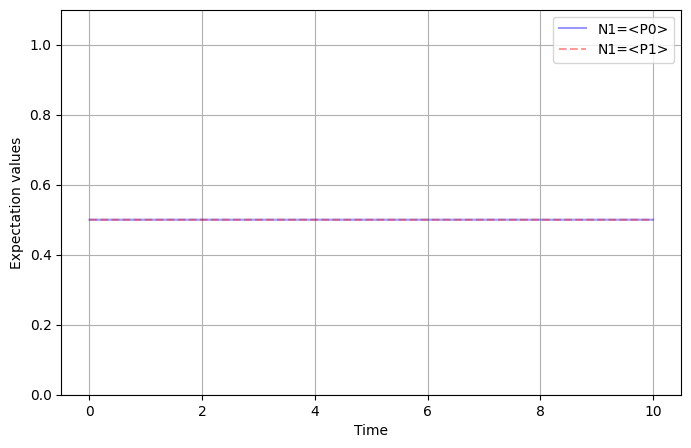

In [17]:
fig = plt.figure(figsize=[8, 5])

plt.plot(result.times, result.expect[0], 'b-', alpha=0.4, label="N1=<P0>")
plt.plot(result.times, result.expect[1], 'r--', alpha=0.4,  label="N1=<P1>")

plt.grid(1)
plt.xlabel('Time')
plt.ylabel('Expectation values')

plt.legend(loc="upper right")
plt.ylim(0, 1.1)

plt.show()
plt.close()

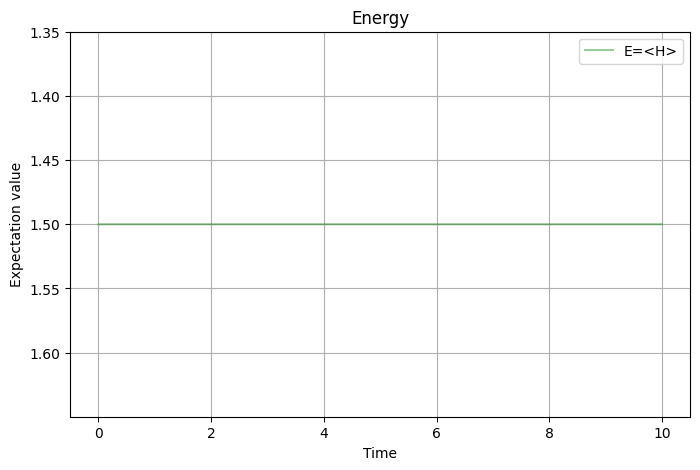

In [18]:
fig = plt.figure(figsize=[8, 5])

Es = result.expect[2]
Eavg = np.average(Es)
Emin = 1.1 * Eavg
Emax = 0.9 * Eavg

plt.plot(result.times, Es, 'g-', alpha=0.4, label="E=<H>")

plt.grid(1)
plt.xlabel('Time')
plt.ylabel('Expectation value')
plt.title("Energy")
plt.legend(loc="upper right")
plt.ylim(Emin, Emax)

plt.show()
plt.close()

In [19]:
# when we have a list in python, its first element is list[0], the last one is list[-1]

result.states[-1]  # the finial state

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.59331569+0.38468265j]
 [ 0.28855731-0.64554661j]]

In [20]:
# let's define a function that extracts probabilities and phases from the results of numerical calculations of the evolition
def calc_phases_probabilities(rslts):
    phases_gnd = []  # phase of the ground state vs time
    probs_gnd = []  # probability of the ground state vs time
    
    phases_exc = []  # phase of the excited state vs time
    probs_exc = []  # probability of the ground state vs time
    
    for state in rslts.states:
        c_gnd = state.overlap(gnd)
        c_exc = state.overlap(exc)  # Cartesian form of the coefficient

        # now convert into polar representation
        pa_gnd, phase_gnd = polar(c_gnd)
        pa_exc, phase_exc = polar(c_exc)

        # add phases and probabilities to the list
        phases_gnd.append(phase_gnd)
        probs_gnd.append(pa_gnd*pa_gnd)    
        phases_exc.append(phase_exc)
        probs_exc.append(pa_exc*pa_exc)

    return phases_gnd, probs_gnd, phases_exc, probs_exc

In [21]:
phases_gnd, probs_gnd, phases_exc, probs_exc = calc_phases_probabilities(result)

We will next plot how probabilities and phases of ground and excited states change in time. For that we will use powerful python library for plotting -- **matplotlib**.

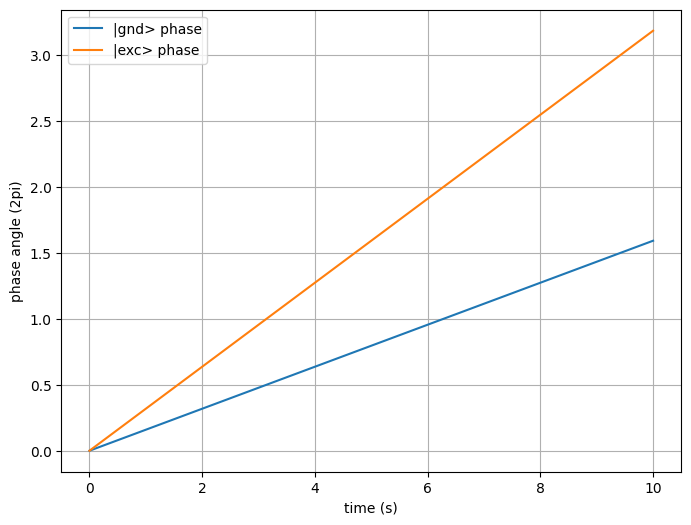

In [22]:
plt.figure(figsize=[8, 6])

# we need to "unwrap" the phases to make them continiously changing, because normally they "fold" and repeat every 2pi
plt.plot(ts, np.unwrap(phases_gnd)/2/np.pi, label="|gnd> phase")
plt.plot(ts, np.unwrap(phases_exc)/2/np.pi, label="|exc> phase")

plt.xlabel("time (s)")
plt.ylabel("phase angle (2pi)")
plt.legend(loc="upper left")

plt.grid(1)
plt.show()

plt.close()

This is expected, because the time-dependence of the state vector can be found analytically in a simple way:

$|\Psi_t\rangle=\left(e^{-iE_0t/\hbar}|gnd\rangle+e^{-iE_1t/\hbar}|exc\rangle\right)/\sqrt{2}$

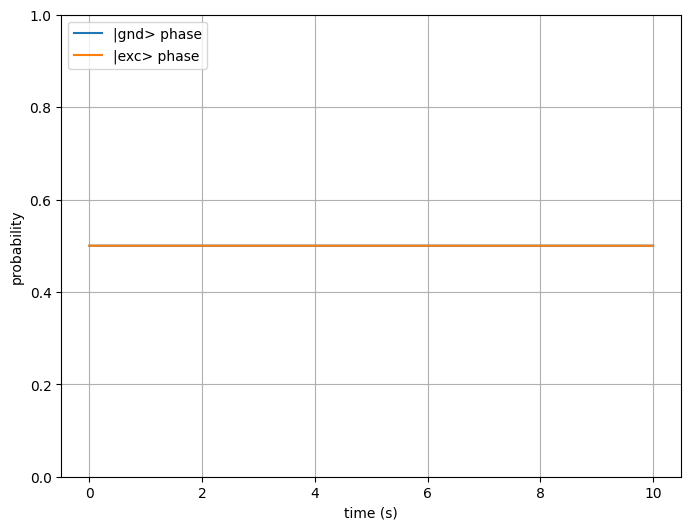

In [23]:
plt.figure(figsize=[8, 6])

plt.plot(ts, probs_gnd, label="|gnd> phase")
plt.plot(ts, probs_exc, label="|exc> phase")

plt.xlabel("time (s)")
plt.ylabel("probability")

plt.legend(loc="upper left")

plt.ylim(0, 1)
plt.grid(1)
plt.show()

plt.close()

This is an example of **unitary dynamics** -- when the state vector maintains its constant "length" -- unit length. Only the relative phases of basis states change. Probabilities remain fixed.

In [24]:
H1.isherm

True

**Exercise**: Evaluate and then plot the evolution of state for (a) $|\Psi_0\rangle=|gnd\rangle$ and (b) $|\Psi_0\rangle=|exc\rangle$

## Part B: Exploring Different Hamiltonians

Let's study other Hamiltonians. First, we will include the term that would generate transition between levels. One such term is an operator $\hat{F}_{+}=|exc\rangle\langle gnd|$ which "flips" the state of a qubit from the ground state to the excited state:

$\hat{F}_{+}\,|gnd\rangle=|exc\rangle\langle gnd|\,|gnd\rangle=|exc\rangle\langle gnd|gnd\rangle=|exc\rangle$

**Exercise**: Calculate what this operator does to a superposition state $|\psi\rangle=\alpha|gnd\rangle+\beta|exc\rangle$. $\hat{F}_{+}\,|\psi\rangle=?$

Our tentative Hamiltonian will have a simple structure:

$\hat{H}_2=E_0|gnd\rangle\langle gnd|+E_1|exc\rangle\langle exc|+\epsilon |exc\rangle\langle gnd|$

where $\epsilon$ is the parameter (same units as $E_i$ -- energy) that represents the "strength" of the "flipping"/transition effects.

In [25]:
Fp = exc * gnd.dag()
Fp

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0. 0.]
 [1. 0.]]

In [26]:
epsilon = 0.5

In [27]:
H2 = E0 * P0 + E1 * P1 + epsilon * Fp
H2

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.  0. ]
 [0.5 2. ]]

*NOTE*: Notice that now the operator is **no longer _Hermitian_**:

In [28]:
H2.isherm

False

What this basically means is that this operator does not respect "conservation" of energy because it contains only one-way transitions -- from the ground to the excited. If we start qubits in the ground state, they will all end up in the excited state, with no clear source of energy. Let's see if our intuitive understanding is correct.

At this point it is convenient to create some python functions that encapsulate the steps needed to do the numeric calculations and then represent the results graphically.

In [29]:
def plot_results(rslt):
    """
    Plot time evolution of the coefficients in superposition:
    phases for both ground and excited states
    probabilities for the same
    """
    phases_gnd, probs_gnd, phases_exc, probs_exc = calc_phases_probabilities(rslt)

    # to check whether the state remains normalized, we calculate total probability
    probs_total = [x+y for (x,y) in zip(probs_gnd, probs_exc)]  # must be 1.0 for normalized state

    # plot phase evolution
    plt.figure(figsize=[8, 4])


    # we need to "unwrap" the phases to make them continiously changing, because normally they "fold" and repeat every 2pi
    plt.plot(ts, np.unwrap(phases_gnd)/2/np.pi, 'b-', alpha=0.5, label="gnd")
    plt.plot(ts, np.unwrap(phases_exc)/2/np.pi, 'r--', alpha=0.5, label="exc")
    
    plt.xlabel("time (s)")
    plt.ylabel("phase angle (2pi)")
    plt.legend(loc="upper right")    
    plt.grid(1)
    plt.show()    
    plt.close()

    # plot probabilities evolution
    plt.figure(figsize=[8, 4])

    plt.plot(ts, probs_gnd, 'b-', alpha=0.5, label="gnd")
    plt.plot(ts, probs_exc, 'r--', alpha=0.5, label="exc")    
    plt.plot(ts, probs_total, 'g-', alpha=0.5, label="total")
    
    plt.xlabel("time (s)")
    plt.ylabel("probability")    
    plt.legend(loc="center")    
    plt.ylim(0, 1.1)
    plt.grid(1)
    plt.show()    
    plt.close()

    # What we actually need to track is the conservation of energy
    # let's calculate and then plot the average energy measured on many-many copies of qubits in state |psi_t>
    fig = plt.figure(figsize=[8, 5])

    Es = rslt.expect[2]
    Eavg = np.average(Es)
    Emin = 1.2 * Eavg
    Emax = 0.8 * Eavg
    
    plt.plot(rslt.times, Es, 'm-', alpha=0.4, label="E=<H>")
    
    plt.grid(1)
    plt.xlabel('Time')
    plt.ylabel('Expectation value')
    plt.title("Energy")
    plt.legend(loc="upper right")
    plt.ylim(Emin, Emax)
    
    plt.show()
    plt.close()

In [30]:
def run_sim_with(hamiltonian, state0, e_ops=None):
    """
    Run simulation with given Hamiltonian and intial state.
    Perform numerical calculation of the state evolution using
    hamiltonian  -- Hamiltonian operator that describes quantum system
    state0 -- initial state.
    """

    # let's check if the Hamiltonian operator is "good" -- Hermitian.
    if not hamiltonian.isherm:
        print("Warning: You are using unphysical Hamiltonian operator!")

    print("Study evolution for intial state")
    print(state0)
    
    # list of times for which the solver should store the state vector
    ts = np.linspace(0, 10, 100)
    
    # numerically 'solving' Schrodinger equation
    if e_ops is None:
        e_ops = [P0, P1, hamiltonian]
    result = sesolve(hamiltonian, state0, ts, e_ops, options={"store_states": True})
    plot_results(result)
    

Study evolution for intial state
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]


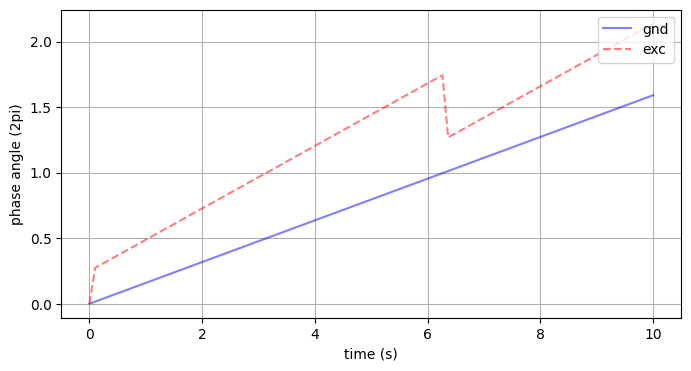

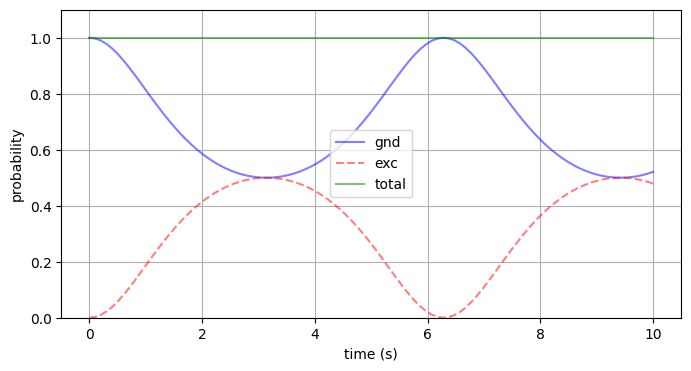

C:\Users\gdesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\gdesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\gdesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\transforms.py:2872: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


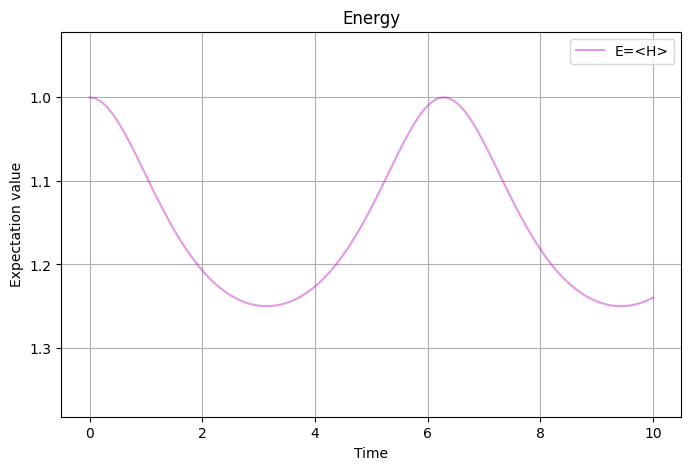

In [31]:
# let's give it a go, using qubit in the ground state:
run_sim_with(H2, gnd)

Let's discuss the results.
*discussion*:

Let us fix the Hamiltonian operator and add the term that describes the process of going from the excited to the ground state: $\hat{F}_{-}=|gnd\rangle\langle exc|$

$\hat{H}_3 = E_0|gnd\rangle\langle gnd| + E_1|exc\rangle\langle exc| + \epsilon|gnd\rangle\langle exc|+\epsilon|exc\rangle\langle gnd|$

In [32]:
Fm = gnd * exc.dag()
Fm

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0. 1.]
 [0. 0.]]

In [33]:
H3 = E0 * P0 + E1 * P1 + epsilon * Fp + epsilon * Fm
H3

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1.  0.5]
 [0.5 2. ]]

In [34]:
H3.isherm

True

This operator is "physically good" -- _Hermitian_ as mathematicians say. How does the evolution look now? Again, start with the ground state

Study evolution for intial state
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]


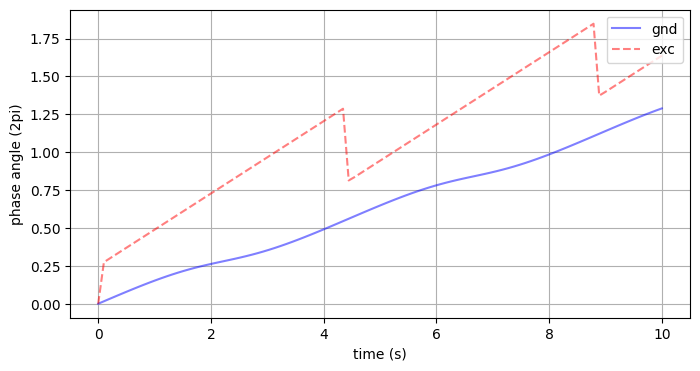

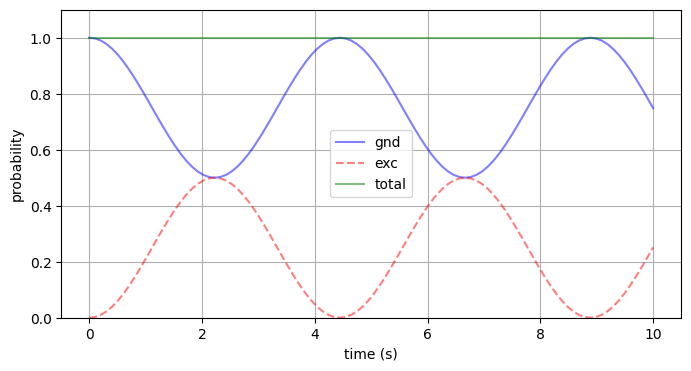

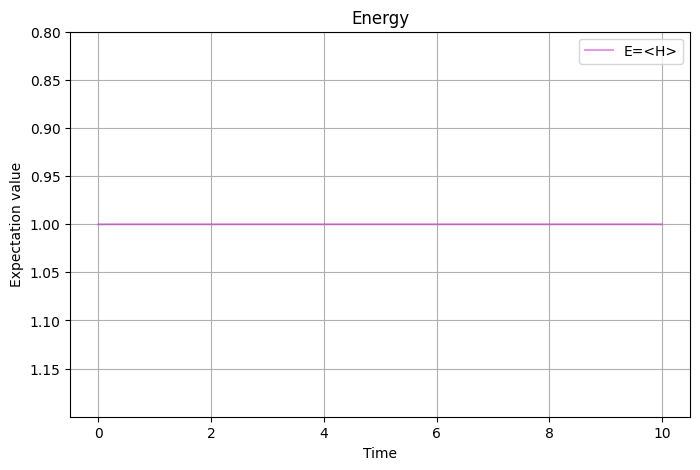

In [35]:
run_sim_with(H3, gnd)

In [36]:
H2.dag() == H2

False

In [37]:
H3.dag() == H3

True

**Exercise**: 

(a) Calculate compositions $\hat{F}_{+}\hat{F}_{+}$, $\hat{F}_{-}\hat{F}_{-}$, $\hat{F}_{+}\hat{F}_{-}$, and $\hat{F}_{-}\hat{F}_{+}$. 

(b) Write the Hamiltonian $\hat{H}_3$ in terms of the flipping operators $\hat{F}_{-}$ and $\hat{F}_{+}$.

The operator $\hat{\sigma}=\hat{F}_{+}+\hat{F}_{-}$ represents interaction that leads to transitions between the ground and excited states.

In [38]:
sigma = Fp + Fm

sigma

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [39]:
Fp * Fm - Fm * Fp 

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-1.  0.]
 [ 0.  1.]]

# Part C: Interacting Qubits

In [40]:
from qutip import sigmax, sigmay, sigmaz

In [41]:
sigmaz()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [42]:
Fz = Fp * Fm - Fm * Fp  # commutator of flipping operators
Fz

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-1.  0.]
 [ 0.  1.]]

In [43]:
hw1 = 1.0
hw2 = 2.0

epsilon = 0.8

In [44]:
H1 = hw1 / 2 * Fz  # Hamiltonian of qubit 1
H2 = hw2 / 2 * Fz  # Hamiltonian of qubit 2

I1 = qeye(2)
I2 = qeye(2)

In [45]:
#H = tensor(H1, I2) + tensor(I1, H2) + epsilon * (tensor(T, I2) * tensor(I1, T))
H = tensor(H1, I2) + tensor(I1, H2) + epsilon * (tensor(Fp, Fm) + tensor(Fm, Fp))
H

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-1.5  0.   0.   0. ]
 [ 0.   0.5  0.8  0. ]
 [ 0.   0.8 -0.5  0. ]
 [ 0.   0.   0.   1.5]]

In [46]:
Ups0 = ket("10")  # the first qubit is excited
Ups0

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

In [47]:
Ups1 = ket("01")

In [48]:
# projectors on basis states
pr0 = Ups0 * Ups0.dag()
pr1 = Ups1 * Ups1.dag()

In [49]:
pr0

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]

Instead of writing the tensor product of ket and bra, we could use the functionality of the state as quantum object and use its "method" .proj which creates a projector from the state:

In [50]:
Ups0.proj()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]

In [63]:
# We will need two more state projectors, although they are not immediately present
Ups2 = ket("00")
Ups3 = ket("11")
pr2 = Ups2.proj()
pr3 = Ups3.proj()

In [64]:
ts = np.linspace(0, 5, 300)
result = sesolve(H, Ups0, ts, e_ops=[H, pr0, pr1, pr2, pr3], options={"store_states": True})

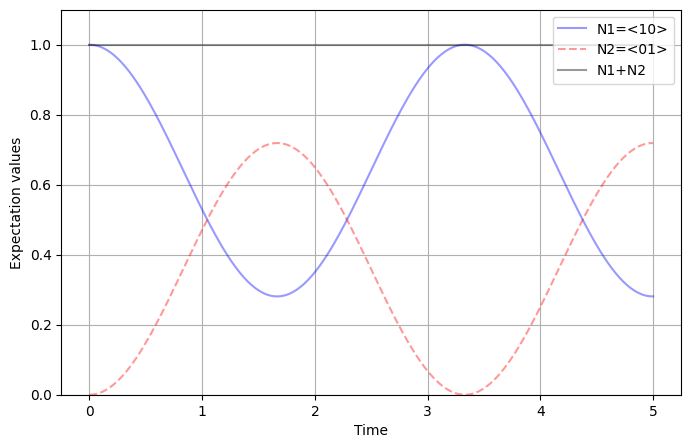

In [65]:
fig = plt.figure(figsize=[8, 5])

plt.plot(result.times, result.expect[1], 'b-', alpha=0.4, label="N1=<10>")
plt.plot(result.times, result.expect[2], 'r--', alpha=0.4,  label="N2=<01>")
plt.plot(result.times, result.expect[1]+result.expect[2], 'k-', alpha=0.4,  label="N1+N2")

plt.grid(1)
plt.xlabel('Time')
plt.ylabel('Expectation values')

plt.legend(loc="upper right")
plt.ylim(0, 1.1)

plt.show()
plt.close()

In [66]:
# let's find where the population is 50%
for i in range(len(result.expect[1])):
    if abs(result.expect[1][i]  - 0.5) < 0.01:
        print(i, ts[i], result.expect[1][i])

62 1.0367892976588629 0.5052788694187375
63 1.0535117056856187 0.4948356311059493
136 2.274247491638796 0.4933980069819197
137 2.290969899665552 0.5038217772858827
261 4.364548494983278 0.506737067498962
262 4.381270903010034 0.49627453356904444


In [67]:
result.states[59]

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.00000000e+00+0.j        ]
 [1.38444766e-17-0.68016639j]
 [5.97210406e-01+0.425104j  ]
 [0.00000000e+00+0.j        ]]

In [68]:
result.states[176]

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.00000000e+00+0.j        ]
 [ 2.03950969e-16-0.30271881j]
 [-9.34111856e-01+0.18919926j]
 [ 0.00000000e+00+0.j        ]]

In [57]:
1/np.sqrt(2)

np.float64(0.7071067811865475)

Thus we have two states $|\Psi_1\rangle = -|\Upsilon_2\rangle/\sqrt{2}+|\Upsilon_3\rangle/\sqrt{2}$ and $|\Psi_2\rangle =-|\Upsilon_2\rangle/\sqrt{2}-|\Upsilon_3\rangle/\sqrt{2}$.

They are the same in terms of probabilities out measurement outcomes for the energy (50% chance to measure ground state and 50% -- excited), but they have different _phase_!

These states are important in quantum physics. They belong to a set of four states (also basis states! you can check.) called *Bell States*:

$|\Phi^{+}\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle|0\rangle+|1\rangle|1\rangle\right)$

$|\Phi^{-}\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle|0\rangle-|1\rangle|1\rangle\right)$

$|\Psi^{+}\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle|1\rangle+|1\rangle|0\rangle\right)$

$|\Psi^{-}\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle|1\rangle-|1\rangle|0\rangle\right)$

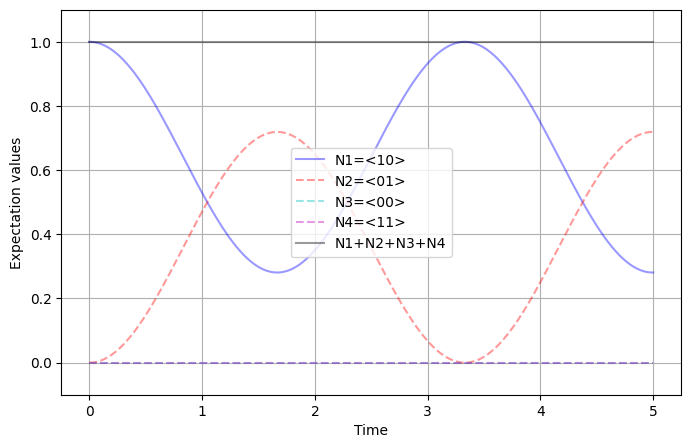

In [58]:
fig = plt.figure(figsize=[8, 5])

plt.plot(result.times, result.expect[1], 'b-', alpha=0.4, label="N1=<10>")
plt.plot(result.times, result.expect[2], 'r--', alpha=0.4,  label="N2=<01>")
plt.plot(result.times, result.expect[3], 'c--', alpha=0.4,  label="N3=<00>")
plt.plot(result.times, result.expect[4], 'm--', alpha=0.4,  label="N4=<11>")

prob_total = result.expect[1]+result.expect[2] + result.expect[3]+result.expect[4]
plt.plot(result.times, prob_total, 'k-', alpha=0.4,  label="N1+N2+N3+N4")

plt.grid(1)
plt.xlabel('Time')
plt.ylabel('Expectation values')

plt.legend(loc="center")
plt.ylim(-0.1, 1.1)

plt.show()
plt.close()

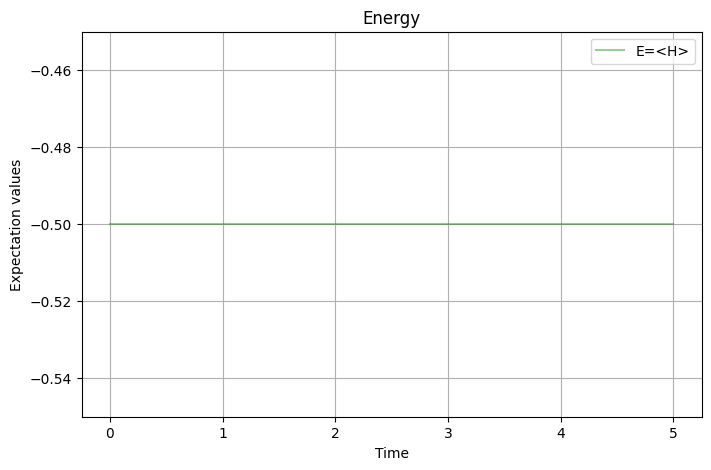

In [59]:
Es = result.expect[0]
Eavg = np.average(Es)
Emin = 1.1 * Eavg
Emax = 0.9 * Eavg

fig = plt.figure(figsize=[8, 5])

plt.plot(result.times, Es, 'g-', alpha=0.4, label="E=<H>")

plt.grid(1)
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.title("Energy")
plt.legend(loc="upper right")
plt.ylim(Emin, Emax)

plt.show()
plt.close()

In [60]:
tensor(H1, I2)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-0.5 -0.   0.   0. ]
 [-0.  -0.5  0.   0. ]
 [ 0.   0.   0.5  0. ]
 [ 0.   0.   0.   0.5]]

# Part D: Three Qubits

In [61]:
hw1 = 1.0
hw2 = 1.1
hw3 = 1.15

In [62]:
H1 = hw1 / 2 * Fz  # Hamiltonian of qubit 1
H2 = hw2 / 2 * Fz  # Hamiltonian of qubit 2
H3 = hw3 / 2 * Fz  # Hamiltonian of qubit 3

T = Fp + Fm # Transition of a single qubit 
I = qeye(2)  # Identity/unit operator for a single qubit